<a href="https://colab.research.google.com/github/Cintia0528/Project-6-Supervised-Machine-Learning---Classification/blob/main/5_b_Housing_Model_Selection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Data Reading

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn import set_config

# reading
url = "https://drive.google.com/file/d/1JsZV_7u1TGiQA863-YtYxlia1VNxAJZj/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)

# X and y creation
## Removing ID as it is unique to each property, and removing MSSubClass as it is a categorization
## of property types, but there is no way to tell which one is better / worse
X = data
y = X.pop("Expensive")
Id = X.pop("Id")

# # Feature Engineering
# X.loc[:, "Cabin"] = X.Cabin.str[0]

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2 Exploratory Analysis


In [ ]:
X.head(20)

In [ ]:
X.info()

In [5]:
X = X.drop_duplicates()

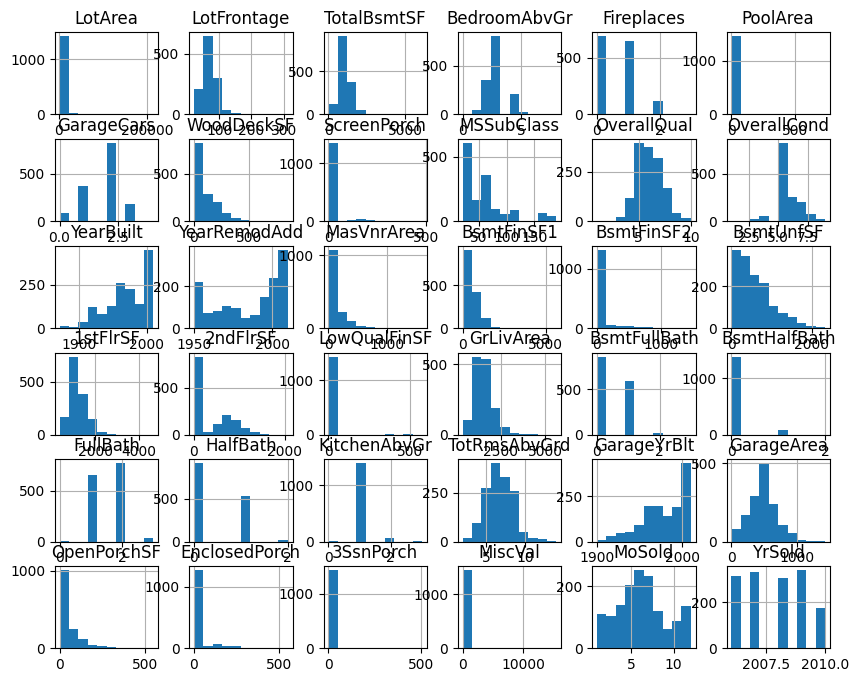

In [6]:
X.hist(figsize = (10,8));

## 3 Building a preprocessor

In [7]:
# 0. Set the config so that we can view our preprocessor
set_config(display="diagram")

# 1. defining categorical & ordinal columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# 2. numerical pipeline , default strategy we search for the best parameters later
numeric_pipe = make_pipeline(
    SimpleImputer())

# 3. categorical pipeline

# # 3.1 defining ordinal & onehot columns
# .get_indexer() get's the index to solve the problem described above about losing column names
ordinal_cols = X_cat.columns.get_indexer(["Street",
                                          "CentralAir",
                                          "ExterQual",
                                          "ExterCond",
                                          "BsmtQual",
                                          "BsmtCond",
                                          "BsmtExposure",
                                          "BsmtFinType1",
                                          "KitchenQual",
                                          "FireplaceQu",
                                          "Alley",
                                          "LotShape",
                                          "Utilities",
                                          "LandSlope",
                                          "RoofMatl",
                                          "BsmtFinType2",
                                          "Functional",
                                          "GarageType",
                                          "GarageFinish",
                                          "GarageQual",
                                          "GarageCond",
                                          "PavedDrive",
                                          "PoolQC",
                                          "Fence"])


onehot_cols = X_cat.columns.get_indexer(["MSZoning",
                                         "Condition1",
                                         "Heating",
                                         "Foundation",
                                         "LotShape",
                                         "LotCongig",
                                         "Neighborhood",
                                         "Condition2",
                                         "BldgType",
                                         "HouseStyle",
                                         "LandContour",
                                         "LotConfig",
                                         "Neighborhood",
                                         "Condition2",
                                         "BldgType",
                                         "HouseStyle",
                                         "RoofStyle",
                                         "Exterior1st",
                                         "Exterior2nd",
                                         "MasVnrType",
                                         "HeatingQc",
                                         "Electrical",
                                         "MiscFeature",
                                         "SaleType",
                                         "SaleCondition"])


# # 3.2. defining the categorical encoder

Street_cats = [ "NA", "Pave", "Grvl"]
CentralAir_cats = ["NA","N", "Y" ]
ExterQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
ExterCond_cats = ["NA","Po","Fa","TA","Gd","Ex"]
BsmtQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
BsmtCond_cats = ["NA","Po","Fa","TA","Gd","Ex"]
BsmtExposure_cats = ["NA", "No","Mn","Av","Gd"]
BsmtFinType1_cats = ["NA", "Unf","LwQ","Rec","BLQ","ALQ","GLQ"]
KitchenQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
FireplaceQu_cats = ["NA","Po","Fa","TA","Gd","Ex"]
Alley_cats = [ "NA", "Pave", "Grvl"]
LotShape_cats = ["NA", "IR3","IR2","IR1","Reg"]
Utilities_cats = ["NA", "ELO","NoSeWa","NoSewr","AllPub"]
LandSlope_cats = ["NA", "Sev","Mod","Gtl"]
RoofMatl_cats = ["NA","WdShngl","WdShake","Tar&Grv","Roll","Metal","Membran","CompShg","ClyTile"]
BsmtFinType2_cats = ["NA", "Unf","LwQ","Rec","BLQ","ALQ","GLQ"]
Functional_cats = ["NA","Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"]
GarageType_cats = ["NA", "Detchd","CarPort","BuiltIn","Basment","Attchd","2Types"]
GarageFinish_cats = ["NA", "Unf","RFn","Fin"]
GarageQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
GarageCond_cats = ["NA","Po","Fa","TA","Gd","Ex"]
PavedDrive_cats = ["NA","N","P","Y"]
PoolQC_cats = ["NA","Fa","TA","Gd","Ex"]
Fence_cats = ["NA", "MnWw","GdWo","MnPrv","GdPrv"]



# # # 3.2.1. we manually establish the order of the categories for our ordinal feature (Cabin) from worst to best, including "N_A"

ordinal_cats = [Street_cats,
                CentralAir_cats,
                ExterQual_cats,
                ExterCond_cats,
                BsmtQual_cats,
                BsmtCond_cats,
                BsmtExposure_cats,
                BsmtFinType1_cats,
                KitchenQual_cats,
                FireplaceQu_cats,
                Alley_cats,
                LotShape_cats,
                Utilities_cats,
                LandSlope_cats,
                RoofMatl_cats,
                BsmtFinType2_cats,
                Functional_cats,
                GarageType_cats,
                GarageFinish_cats,
                GarageQual_cats,
                GarageCond_cats,
                PavedDrive_cats,
                PoolQC_cats,
                Fence_cats]

ordinal_encoder = OrdinalEncoder(categories=ordinal_cats)

# # # 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", ordinal_encoder, ordinal_cols),
        ("cat_onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_cols),
    ]
)

# # 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="NA"),
                                 categorical_encoder
                                )

# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

full_preprocessing

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',...
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])

## 4 Modelling


### 4.1 Decision Tree

In [8]:
from sklearn.model_selection import GridSearchCV

# full pipeline: preprocessor + model
full_pipeline = make_pipeline(full_preprocessing,
                              DecisionTreeClassifier())

# define parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median", "most_frequent", "constant"],
    "decisiontreeclassifier__max_depth": range(1, 16, 2),
    "decisiontreeclassifier__min_samples_leaf": range(2, 16, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median',
                                                                                  'most_frequent',
                                                                                  'constant'],
                         'decisiontreeclassifier__max_depth': range(1, 16, 2),
                         'decisiontreeclassifier__min_samples_leaf': range(2, 16, 2)},
             verbose=1)

In [9]:
search.fit(X_train, y_train)

print(f"The best average score in cross validation was {search.best_score_}")
print(f"The best parameters are {search.best_params_}")

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
The best average score in cross validation was 0.9349473606984336
The best parameters are {'columntransformer__num_pipe__simpleimputer__strategy': 'most_frequent', 'decisiontreeclassifier__max_depth': 13, 'decisiontreeclassifier__min_samples_leaf': 4}


In [61]:
accuracy_score(search.predict(X_test), y_test)

0.934931506849315

###  4.2 KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_full_pipeline = make_pipeline(full_preprocessing,
                                StandardScaler(),
                              KNeighborsClassifier())

knn_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2,50),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      knn_param_grid,
                      cv=5,
                      verbose=1)



In [11]:
knn_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {knn_search.best_score_}")
print(f"The best parameters are {knn_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
The best average score in cross validation was 0.9203844319724148
The best parameters are {'columntransformer__num_pipe__simpleimputer__strategy': 'mean', 'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__weights': 'distance'}


In [12]:
accuracy_score(knn_search.predict(X_test), y_test)

0.9212328767123288

### 4.3 Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier


rnf_full_pipeline = make_pipeline(full_preprocessing,
                                StandardScaler(),
                             RandomForestClassifier())

rnf_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "randomforestclassifier__n_estimators": range(100,200, 50),
    "randomforestclassifier__criterion": ["gini", "entropy"],
    "randomforestclassifier__max_depth": range(1,12,2),
    "randomforestclassifier__min_samples_leaf": range(1,5)
}

rnf_search = GridSearchCV(rnf_full_pipeline,
                      rnf_param_grid,
                      cv=5,
                      verbose=1)


In [14]:
rnf_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {rnf_search.best_score_}")
print(f"The best parameters are {rnf_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
The best average score in cross validation was 0.952048714280474
The best parameters are {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 11, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 150}


In [68]:
accuracy_score(rnf_search.predict(X_test), y_test)

0.9486301369863014

### 4.4 XGBoost

In [15]:
from xgboost import XGBClassifier


# XGBoost pipeline
xgb_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  XGBClassifier())

# Parameter grid for XGBoost
xgb_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "xgbclassifier__n_estimators": [100, 150, 200],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2],
    "xgbclassifier__max_depth": [3, 5, 7],
    "xgbclassifier__min_child_weight": [1, 3, 5]
}

# GridSearchCV for XGBoost
xgb_search = GridSearchCV(xgb_full_pipeline,
                          xgb_param_grid,
                          cv=5,
                          verbose=1)


In [16]:
xgb_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {xgb_search.best_score_}")
print(f"The best parameters are {xgb_search.best_params_}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
The best average score in cross validation was 0.9503539855471186
The best parameters are {'columntransformer__num_pipe__simpleimputer__strategy': 'median', 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 100}


In [72]:
accuracy_score(xgb_search.predict(X_test), y_test)

0.9623287671232876

In [26]:

Train = [0.933 , 0.920 , 0.955, 0.950]
Test = [0.935 , 0.921 , 0.949, 0.962]
Scores = pd.DataFrame([Train, Test],
                                  columns = ["Decision Tree" ,"KNN" , "Random Forest" , "XGBoost" ],
                                  index = ["Train", "Test"])
Scores

,Decision Tree,KNN,Random Forest,XGBoost
Train,0.933,0.920,0.955,0.950
Test,0.935,0.921,0.949,0.962


## Error Analysis

### 5.1 Decision Tree

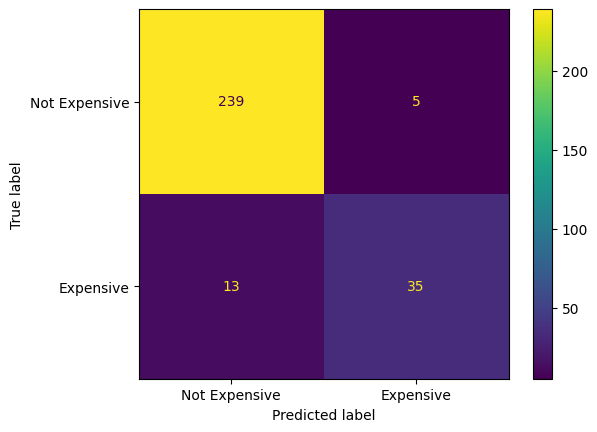

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=["Not Expensive", "Expensive"]);

### 5.2 KNN

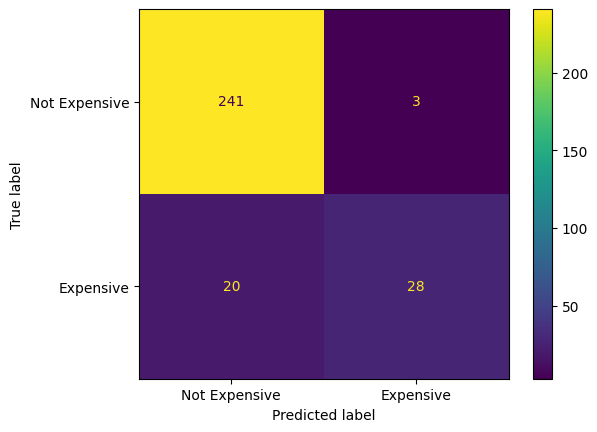

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_search,
                                      X_test,
                                      y_test,
                                      display_labels=["Not Expensive", "Expensive"]);

### 5.3 Random Forest

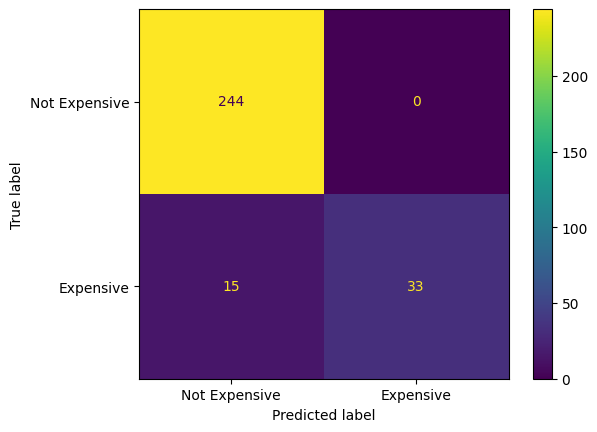

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rnf_search,
                                      X_test,
                                      y_test,
                                      display_labels=["Not Expensive", "Expensive"]);

### 5.4 XGBoost

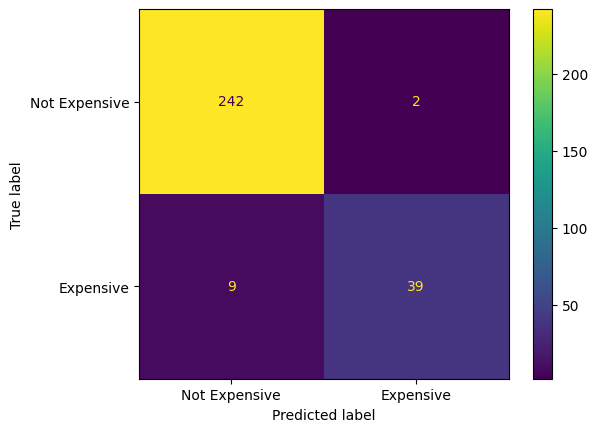

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb_search,
                                      X_test,
                                      y_test,
                                      display_labels=["Not Expensive", "Expensive"]);

In [27]:

Expensive = [35, 28, 33, 39]
Not_Expensive = [239, 241, 244, 242]
False_Positive = [5, 3, 0, 2]
False_Negative = [13, 20, 15, 9]
Test_Accuracy = [0.935 , 0.921 , 0.949, 0.962]

Scores = pd.DataFrame([Expensive, Not_Expensive, False_Positive, False_Negative, Test_Accuracy],
                      columns=["Decision Tree", "KNN", "Random Forest", "XGBoost"],
                      index=["Expensive", "Not Expensive", "False Positive", "False Negative", "Test Accuracy"])


Scores

,Decision Tree,KNN,Random Forest,XGBoost
Expensive,35.000,28.000,33.000,39.000
Not Expensive,239.000,241.000,244.000,242.000
False Positive,5.000,3.000,0.000,2.000
False Negative,13.000,20.000,15.000,9.000
Test Accuracy,0.935,0.921,0.949,0.962


## 5 Final Submission


In [89]:
url = "https://drive.google.com/file/d/14gPDFgjp9Up3tQBetXVMhh0MQepvaj_c/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
new_data = pd.read_csv(path)

In [90]:
id_col = new_data.pop('Id')

In [91]:
xgb_search.best_estimator_.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrA...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [92]:
expensive = xgb_search.best_estimator_.predict(new_data)
expensive

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
submission_file = pd.DataFrame({
    'Id':id_col,
    'Expensive':expensive
})

In [94]:
# from google.colab import files
# submission_file.to_csv('submission.csv',index=False)
# files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>